In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#load data
df = pd.read_csv('D:\Downloads\marketing_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Assesment Report:
Quality Issues 
1. There is space in income collumn name
2. Income column has 24 missing values
3. There are dollars sign, spaces, commas, and dots in value of income
4. Income's type is string
5. Dt_Customer's type is string


Data Cleaning

In [7]:
df_copy = df.copy()

Issue 1 : There is a space in income's column name

In [8]:
df_copy.rename(columns={' Income ':'Income'}, inplace=True)

Test

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Issue 2 : There are dollar signs, paces, commas, and dots in the value of Income column

Check

In [10]:
df_copy.Income.sample(5)

1812    $58,086.00 
275     $70,091.00 
2103    $71,952.00 
1245    $51,390.00 
68      $38,578.00 
Name: Income, dtype: object

Let's Fix that

In [11]:
df_copy.Income = df_copy.Income.str.strip('$')
df_copy.Income = df_copy.Income.str.replace(".", "")
df_copy.Income = df_copy.Income.str.replace(",", "")
df_copy.Income = df_copy.Income.str.replace("00", "")

Test

In [12]:
df_copy.Income.sample(5)

2052    46891 
1948    51012 
979     29187 
352     30675 
740      9548 
Name: Income, dtype: object

Issue 3 : "Income" column has 24 missing values

Issue 4 : Income's type is string

Check

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Let's Fix that

In [14]:
# divide the data into two dataframes: one has income values, and the other doesn't.
have_income = df_copy[df_copy.Income.isnull()==False]
missing_income = df_copy[df_copy.Income.isnull()==True]

In [15]:
# convert income that has value to int type
have_income.Income = have_income.Income.astype(int)

# give a string value of "0" to missing, then we convert it into type
missing_income.Income = str(have_income.Income.median())

missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype(int)

In [16]:
# combine the data
df_copy = pd.concat([have_income, missing_income], ignore_index=True)

Test

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int32 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Issue 5 : Dt_Customer's type is string

In [18]:
df_copy.Dt_Customer = pd.to_datetime(df_copy.Dt_Customer)

Test

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Final step of Wrangling and Cleaning Data : Store Data

In [20]:
# store the file
# store the file
df_copy.reset_index(drop=True, inplace=True)
df_copy.to_csv('clean_df.csv', index=False)

In [21]:
# Load data
df = pd.read_csv('clean_df.csv')

# 01. Exploratory Data Analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

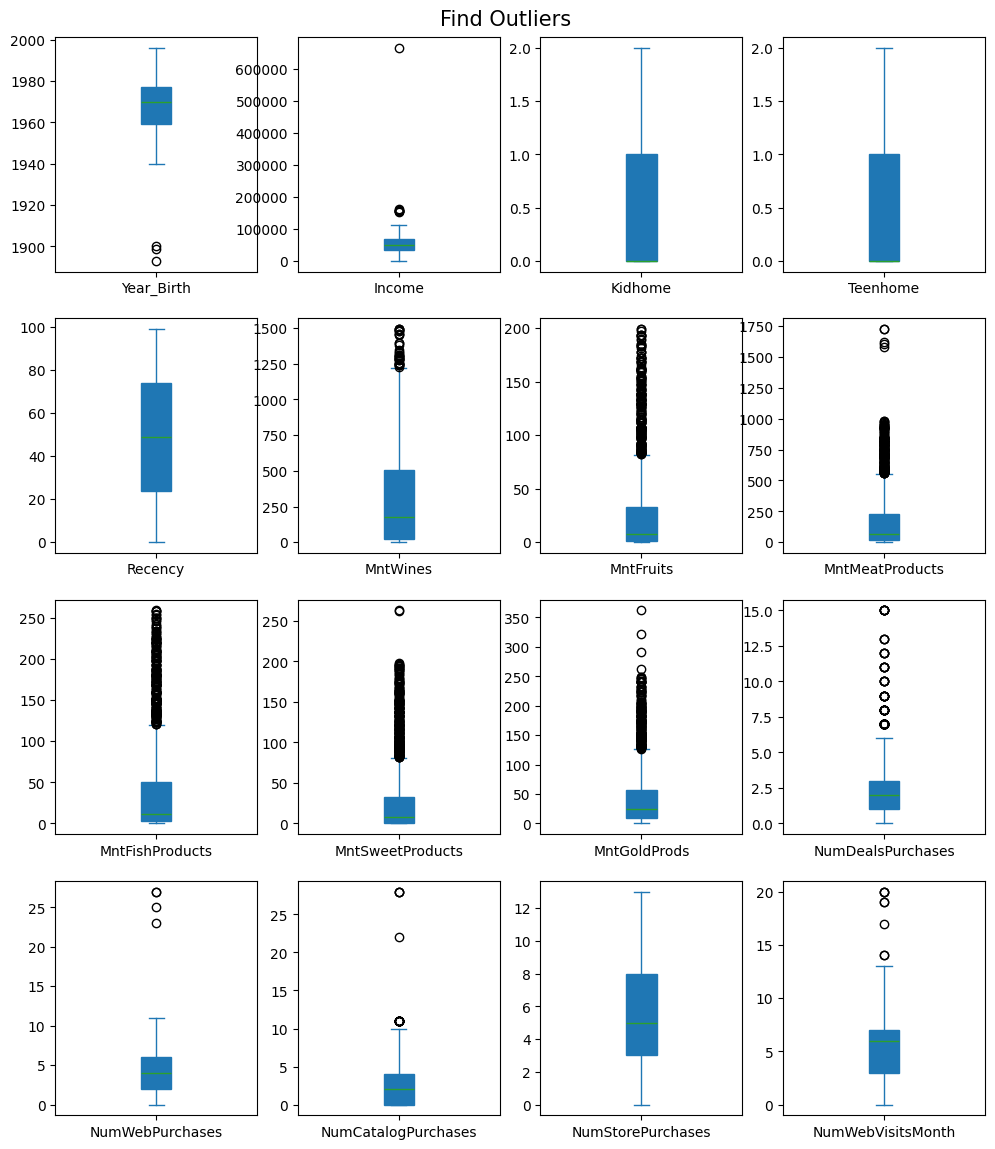

In [23]:
# Check if there is any ouliers

# Select column to plot
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# Subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

Section 1-1: Are there any null values or outliers? How to wrangle/handle them?

1. Income has 24 null values, and i used the media number to fill in
2. There are many columns having outliers, but most of them seem like natural outliers came from population, whereas the outliers in Year_birth seems like entry errors since it's impossible that people who was born before 1900 still alive. Therefore, I will remove the outliers in Year_birth. 

In [27]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [28]:
# Remove outliers in year_birth
new_df = df[df.Year_Birth >= (df.Year_Birth.mean() - 3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Section 1-2:Are there any useful variables that you can engineer with the given data?
1. Join_Year : The year that person become a customer, which can be engineered from "Dt_Customer"
2. Join_Month : The month that person become a customer, which can be engineered from "Dt_Customer"
3. Join_Weekday : The day of the week that person become a customer, which can be engineered from "Dt_Customer"
4. Minorhome : The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
5. Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns.
6. Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns.
7. Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column.
8. "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [29]:
new_df.Dt_Customer = pd.to_datetime(new_df.Dt_Customer)

In [30]:
# Create new features
new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase

In [32]:
new_df.sample(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
889,10242,1966,PhD,Together,47472,1,1,2013-09-16,39,56,0,11,0,0,8,2,2,0,4,5,0,0,0,0,0,0,0,SP,2013,9,0,2,75,13,0,5.769231
1651,1672,1974,PhD,Together,65640,0,1,2014-03-01,74,204,7,149,20,15,66,1,5,1,8,2,0,0,0,0,0,0,0,SA,2014,3,5,1,461,17,0,27.117647
1060,4369,1957,Master,Absurd,65487,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA,2014,1,4,0,1169,19,0,61.526316
1147,8534,1952,Graduation,Married,67433,0,2,2013-07-16,51,615,28,259,12,48,30,4,6,5,13,4,0,1,0,0,0,0,0,SP,2013,7,1,2,992,32,1,31.000000
352,1970,1968,Master,Together,34053,0,1,2012-09-10,14,63,0,21,7,0,12,1,3,0,3,8,0,0,0,0,0,0,0,SP,2012,9,0,1,103,15,0,6.866667
1214,7297,1973,Graduation,Single,75,1,0,2013-12-26,54,5,3,10,12,7,20,4,3,1,3,7,0,0,0,0,0,0,0,SA,2013,12,3,1,57,18,0,3.166667


Section 1-3 : Patterns and Anomalies 



Correlation between variables

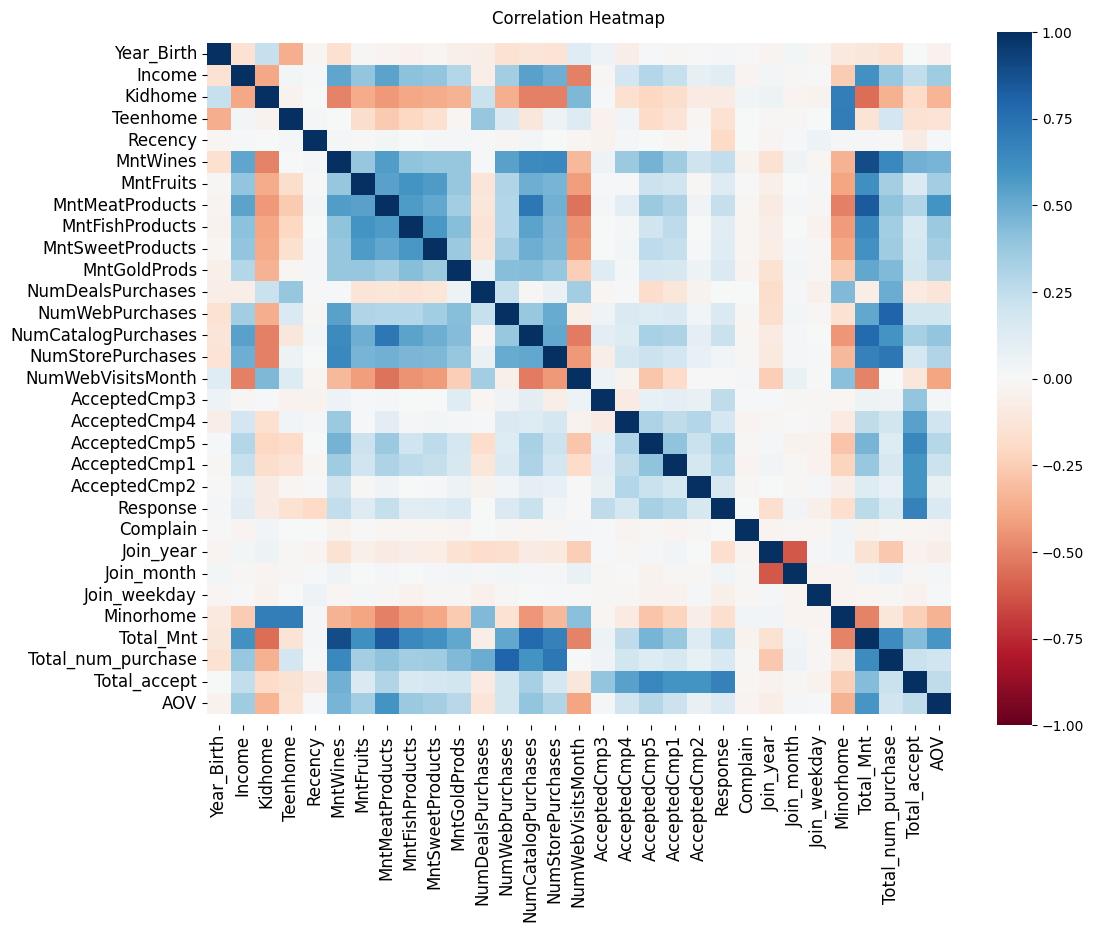

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# select columns to plot
df_to_plot = new_df.select_dtypes(include=['int', 'float']).drop(columns=['ID'])

# create heatmap
plt.figure(figsize=(12, 9))
s = sns.heatmap(df_to_plot.corr(), cmap='RdBu', vmin=-1, vmax=1, center=0)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

Patterns :
1. High Income People
- Tend to spend more and purchase more
- Tend to visit the company's website less frequently than other people
- Tend to has few number of purchases made with a discount

2. People having kids at home
- Tend to spend less and purchase less 
- Tend to has high number of purchases made with a discount

3. People who purchased with high average order volume
- Tend to buy more wines and meat products
- Tend to make high number of purchases made using a catalog
- Tend to not visit the company's website

Anomalies: 
Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years => After further investigating the data, I found that it is because we only have 20 customers who complained in the last two years, but we have 2200 customers in total. The customer service in the company has done a wonderful job in the last two years.

In [34]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

<Figure size 3000x2000 with 0 Axes>

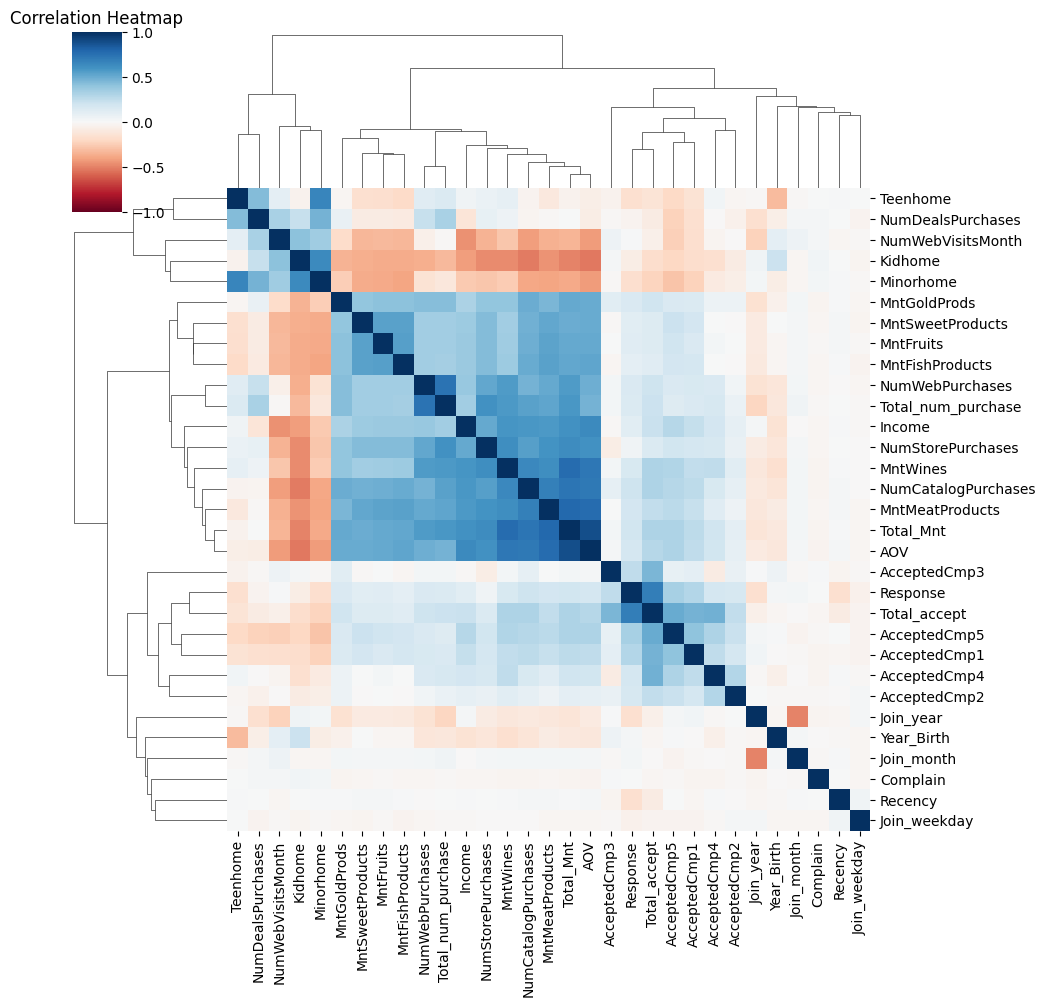

In [35]:
#select columns to plot
df_to_plot = new_df.select_dtypes(include=['int', 'float']).drop(columns=['ID'])

plt.figure(figsize = (30,20))
s = sb.clustermap(df_to_plot.corr(method = 'kendall'),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)

plt.title("Correlation Heatmap")
plt.show()

Anomalies
Intuitively, I'd think the more complaints a customer has, the less he/she may spend on our store, but the number of complain in the last two years has almost no correlation with the total amount spent in the last two years

In [36]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

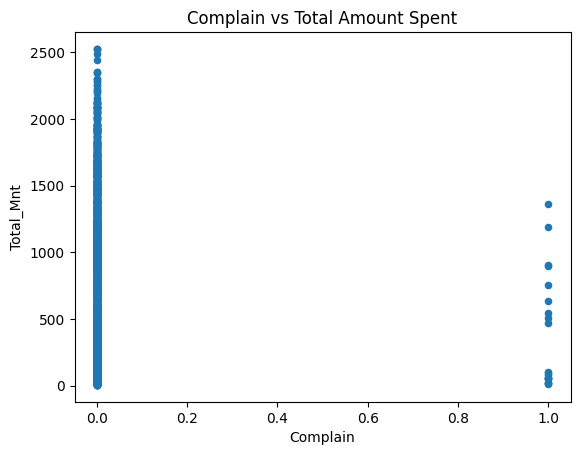

In [37]:
# Visualize Complain vs Total Amount Spent
new_df.plot(x='Complain', y='Total_Mnt', kind='scatter')
plt.title("Complain vs Total Amount Spent");

In [38]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.0337396509126639
Pearson p-value:  0.11063526070954044


In [39]:
new_df[new_df.Complain > 0].ID.nunique()

20

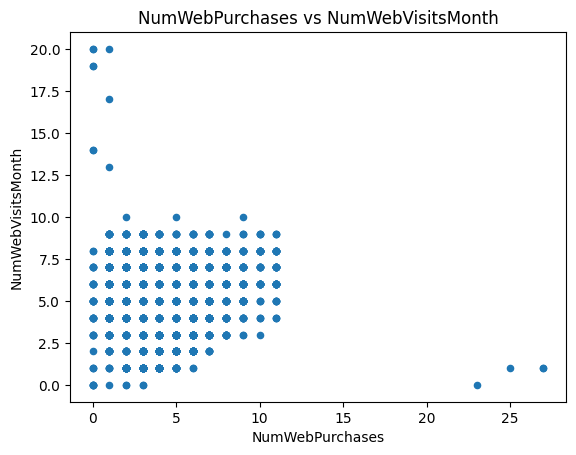

In [40]:
# Visualize NumWebPurchases vs NumWebVisitsMonth
new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

Indeed, the scatter plot of NumWebPurchases vs NumWebVisitsMonth doesn't show any correlation.

Section 2-1: What factors are significantly related to the number of store purchases?

We can use random forest to predict the number of store purchases and then use the model's feature importance score to rank the factors.

Text(0.5, 1.0, 'Distribution of the number of store purchases')

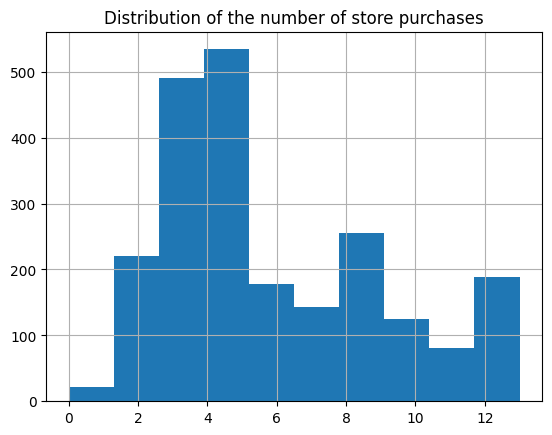

In [41]:
new_df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases")

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   int64         
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-null   i

In [43]:
from sklearn.ensemble import RandomForestRegressor
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer'])
rd_df.replace([np.inf, -np.inf], 0, inplace = True)

# One-hot encoding 
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X = rd_df.drop(columns=['NumStorePurchases']) # Features
y = rd_df['NumStorePurchases'] # Labels

# Split dataset into training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# 70% for training, 30% for test

# Import random forest model
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Clasifier with 100 trees
rg = RandomForestRegressor(n_estimators=100, n_jobs = -1)

# Train the model using training sets y_pred = clf.predict(X_test)
rg.fit(X_train, y_train)

y_pred=rg.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.7819940476190477
Mean Squared Error: 1.3911690476190477
Root Mean Squared Error: 1.1794782946790703


Finding: The range of NumStorePurchases is 13, and the Root Mean Squared Error is only 1.1(the error is small), which means it is a relaible model.

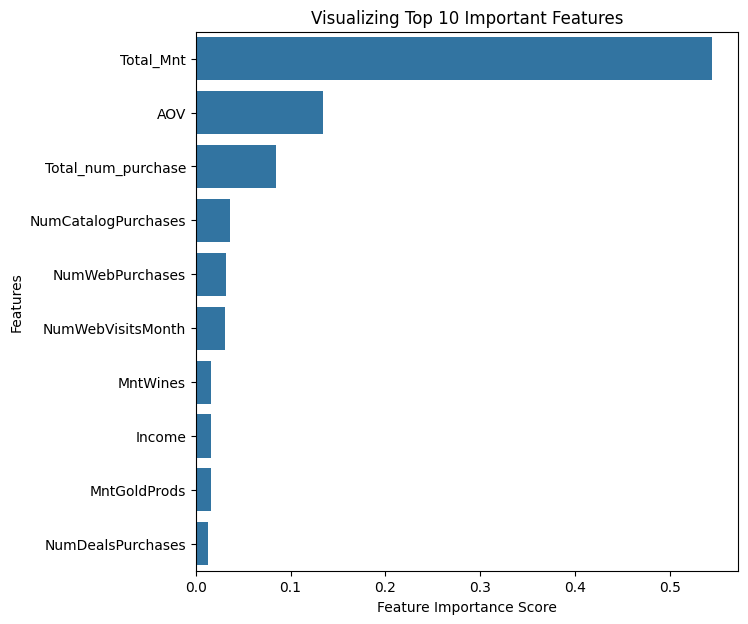

In [44]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')

Top 7 factors are 1. Total amount spent in the last two years 2. Amount spent on wine in the last 2 years 3. Average order volume 4. Total number of purchases in the last two years 5. Number of purchases made using a catalog 6. Number of visits to company's web site in the last month 7. Total number of purchases through website in the last two years

 97%|=================== | 654/672 [00:11<00:00]       

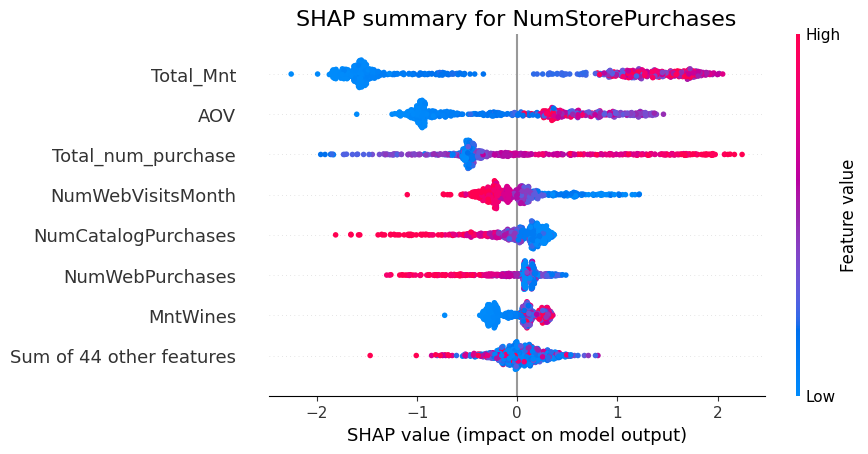

<Figure size 640x480 with 0 Axes>

In [45]:
import shap

# convert the data to the correct data type
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# calculate shap values 
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()



    Finding: 1. The number of store purchase increases with higher total amount spent, higher total purchase amount, higher AOV, and higher amount of wines purchases. 2. The number of store purchase decreases with higher number of website visits, higher number of purchases through catalog, and higher number of purchases through websites.

    Summary: People who mostly shop at store tend to buy more wines, have higher average order volumne, and shop less through internet of catalog.



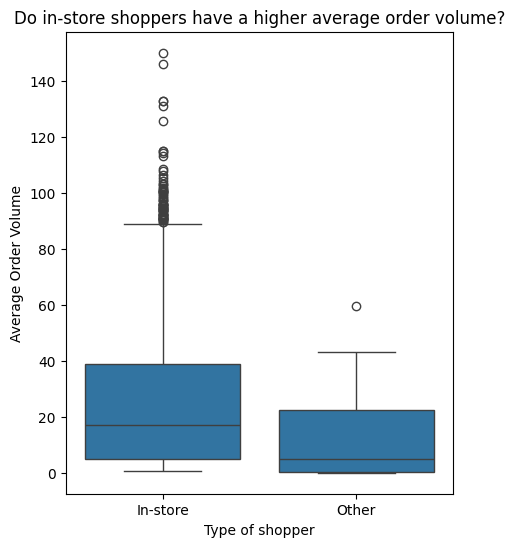

In [47]:
store_shoppers = new_df[new_df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"

other_shoppers = new_df[new_df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

all_shoppers = pd.concat([store_shoppers, other_shoppers], ignore_index=True)

plt.figure(figsize=(5, 6))
plt.title("Do in-store shoppers have a higher average order volume?")
sb.boxplot(data=all_shoppers, x='Type of shopper', y='AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

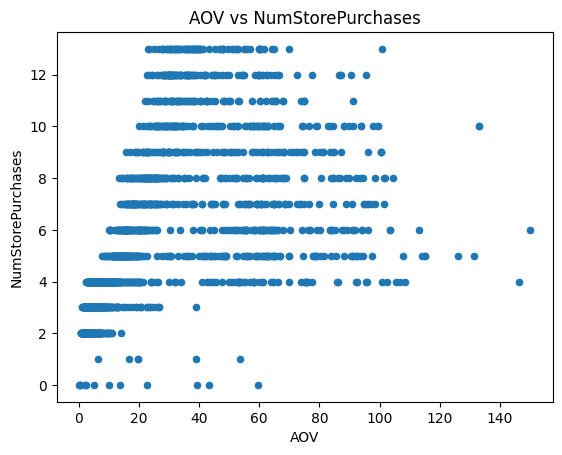

In [48]:
# Visualize MntGoldProds vs NumStorePurchases
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [49]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5505389394031149
Pearson p-value:  2.0526348645363996e-177


### Section 2-2: Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

Yes, they are statistically significant that they have positive correlation

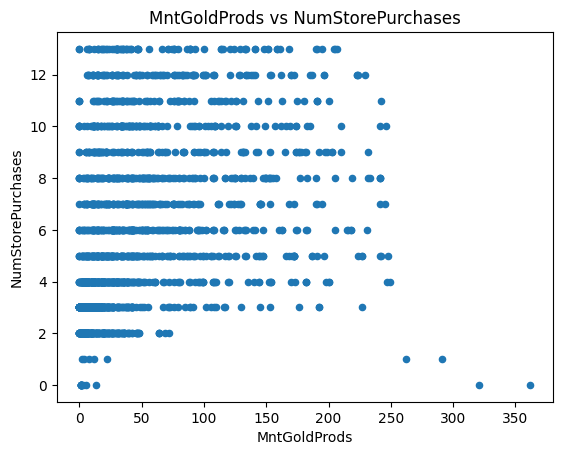

In [50]:
# Visualize MntGoldProds vs NumStorePurchases
new_df.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [51]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['MntGoldProds'], y=new_df['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.3832641863470436
Pearson p-value:  3.466897441778712e-79


Text(0, 0.5, 'Number of In-Store Purchases')

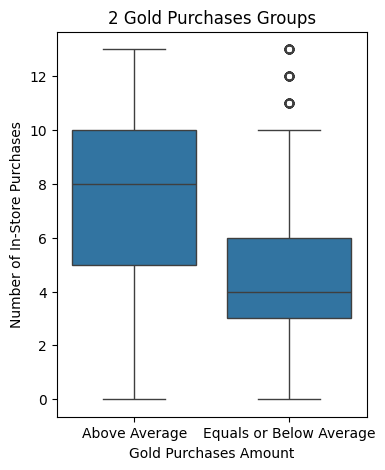

In [53]:
gold_above_avg = new_df[new_df.MntGoldProds > new_df.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"

gold_equ_or_below_avg = new_df[new_df.MntGoldProds <= new_df.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize=(4, 5))
df_gold = pd.concat([gold_above_avg, gold_equ_or_below_avg], ignore_index=True)
plt.title("2 Gold Purchases Groups")
sb.boxplot(data=df_gold, x='Gold Purchases Amount', y='NumStorePurchases')
plt.ylabel("Number of In-Store Purchases")

### Section 2-3: Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? 

Married PhD spends less on fish products than the rest.

In [54]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

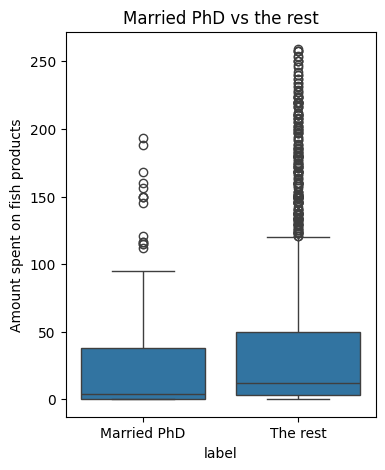

In [56]:
married_phd = new_df[(new_df.Education == "PhD") & (new_df.Marital_Status == "Married")]
married_phd['label'] = "Married PhD"

the_rest = new_df[(new_df.Education != "PhD") | (new_df.Marital_Status != "Married")]
the_rest['label'] = "The rest"

df_combined = pd.concat([married_phd, the_rest], ignore_index=True)
plt.figure(figsize=(4, 5))
plt.title("Married PhD vs the rest")
sb.boxplot(data=df_combined, x='label', y='MntFishProducts')
plt.ylabel("Amount spent on fish products")
plt.savefig('Married PhD vs the rest.png', bbox_inches='tight')

In [57]:
# use t-test to test these two groups have the same mean
from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.
pval = ttest_ind(married_phd.MntFishProducts, the_rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005297012242158541


Note: Since p-value is less than 0.05, I concluded that we reject the null hypothesis, meaning that their means are not only different, but the Married Phd's mean is lower than the rest as we can see from the graph.

### Section 3-1: Which marketing campaign is most successful?

The last marketing campaign is most successful. 

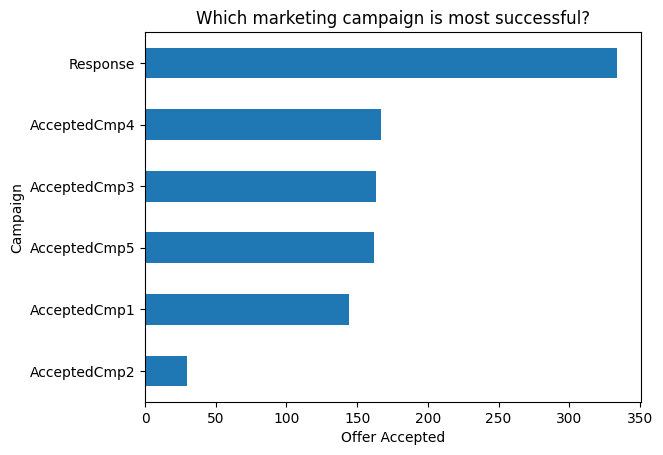

In [58]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

### Section 3-2: What does the average customer look like for this company?

An average customer...
- has an annual income of 52200 dollars
- had purchased 49 days ago
- has an AOV of 26.8 dollars
- has spent 605 dollars
- has purchased 20 times
- became a customer in mid-June
- became a customer on Thursday
- spent most on wines(300 dollars) and then meat products(165 dollars)
- spent least on fruit(26 dollars) and sweet products(27 dollars)

In [59]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

### Section 3-3: Which marketing channels are underperforming?
Catalog is the most underperforming channel.

Text(0, 0.5, 'Channel')

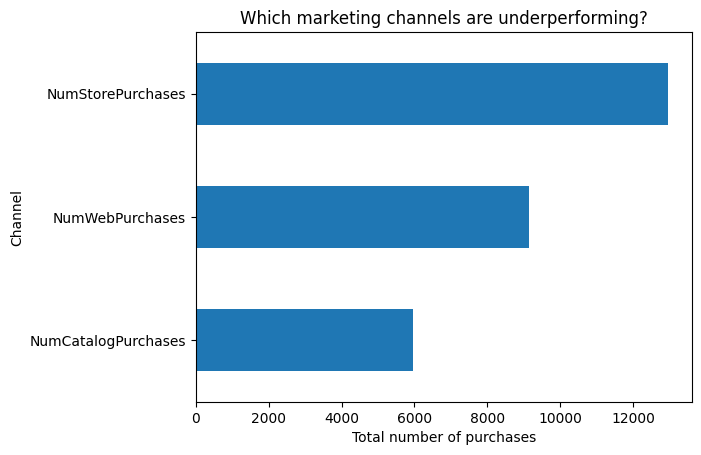

In [62]:
new_df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

## Further Investigation:
Now that we know the last campaign is the most successful one, we can further investigate the differences in the customer characteristics and purchases behaviors(listed below) between the most succesful campaign, the last one, and the rest of the campaigns, the campaign 1-5.

- Characteristics: 'Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday'
- Purchase behaviors: 
    - Products: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    - Channel: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    - Total: 'Total_Mnt', 'Total_num_purchase', 'AOV'


In [63]:
# create 2 groups that accepted the offers from the last campaign and the campaign 1-5
cp_last = new_df[new_df.Response > 0]
cp__the_rest = new_df[new_df.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(334, 2207)

In [64]:
new_df.Country.value_counts()

Country
SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: count, dtype: int64

In [65]:
# remove the overlapping customers who accepted offers from both cp_last and cp__the_rest 
# so that twe can see the clear differences between these two groups
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.ID):
    if i in list(cp_last.ID):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.ID != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(334, 1893)

In [66]:
cp_last = cp_last[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
cp__the_rest2 = cp__the_rest2[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]

In [74]:
print(new_df2.dtypes)

# Identify the non-numeric columns
non_numeric_cols = new_df2.select_dtypes(exclude=['number']).columns

# Remove the non-numeric columns or convert them to numeric
new_df2 = new_df2.drop(non_numeric_cols, axis=1)

# Calculate the mean
mean_values = new_df2.mean()
print(mean_values)

Year_Birth               int64
Income                   int64
Minorhome                int64
Country                 object
Join_month               int32
Join_weekday             int32
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Total_Mnt                int64
Total_num_purchase       int64
AOV                    float64
dtype: object
Year_Birth              1968.901654
Income                 50662.735360
Minorhome                  0.950827
Join_month                 6.465802
Join_weekday               2.988824
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          

In [76]:
print(cp_last.dtypes)
print(new_df2.dtypes)

Year_Birth               int64
Income                   int64
Minorhome                int64
Country                 object
Join_month               int32
Join_weekday             int32
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Total_Mnt                int64
Total_num_purchase       int64
AOV                    float64
dtype: object
Year_Birth               int64
Income                   int64
Minorhome                int64
Join_month               int32
Join_weekday             int32
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Total_Mnt                int64
Total_num_purchase       

In [77]:
# Drop non-numeric columns
cp_last_numeric = cp_last.select_dtypes(include=['number'])
new_df2_numeric = new_df2.select_dtypes(include=['number'])

# Calculate the mean
value1 = pd.DataFrame((((cp_last_numeric.mean()) - new_df2_numeric.mean()) / new_df2_numeric.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0

Text(0, 0.5, 'Characteristics')

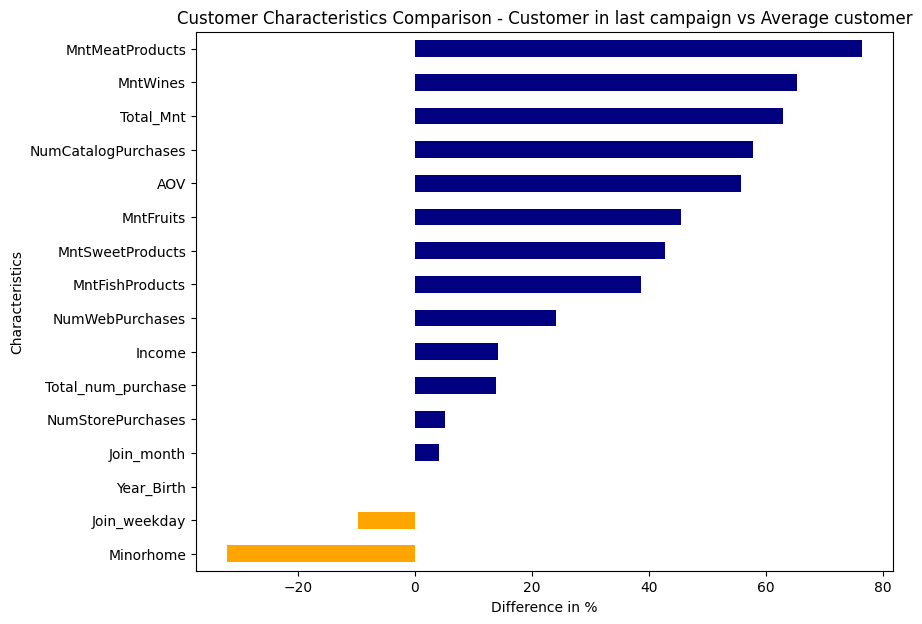

In [78]:
plt.figure(figsize = (9, 7))
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")

In [80]:
print(cp__the_rest2.dtypes)

Year_Birth               int64
Income                   int64
Minorhome                int64
Country                 object
Join_month               int32
Join_weekday             int32
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Total_Mnt                int64
Total_num_purchase       int64
AOV                    float64
dtype: object


In [81]:
# Drop non-numeric columns
cp__the_rest2_numeric = cp__the_rest2.select_dtypes(include=['number'])

# Calculate the mean
cp__the_rest2_mean = cp__the_rest2_numeric.mean()

Text(0, 0.5, 'Characteristics')

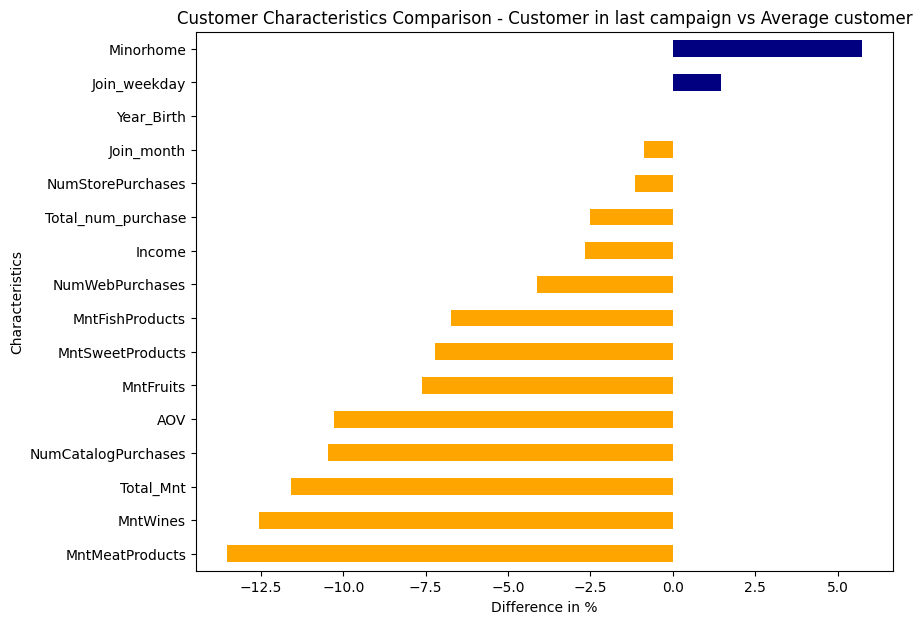

In [82]:
# Your original code
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp__the_rest2_mean) - new_df2.mean()) / new_df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics")

In [83]:
cp_last_country = pd.DataFrame((cp_last.Country.value_counts()/cp_last.shape[0])*100)
cp_last_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_last_country['country'] = cp_last_country.index
cp_last_country = cp_last_country.sort_values('country')
cp_last_country.drop(['country'], axis=1, inplace=True)
cp_last_country

,count
Country,
AUS,6.886228
CA,11.377246
GER,5.089820
IND,3.892216
ME,0.598802
SA,15.568862
SP,52.694611
US,3.892216


In [84]:
cp__the_rest2_country = pd.DataFrame((cp__the_rest2.Country.value_counts()/cp__the_rest2.shape[0])*100)
cp__the_rest2_country.rename(columns={'Country':'Percent'}, inplace=True)
cp__the_rest2_country['country'] = cp__the_rest2_country.index
cp__the_rest2_country = cp__the_rest2_country.sort_values('country')
cp__the_rest2_country.drop(['country'], axis=1, inplace=True)
cp__the_rest2_country

,count
Country,
AUS,7.237190
CA,12.097200
GER,5.335446
IND,7.025885
ME,0.052826
SA,14.896989
SP,48.283148
US,5.071315


In [86]:
print(country_final.columns)

Index(['count'], dtype='object')


<Axes: ylabel='Country'>

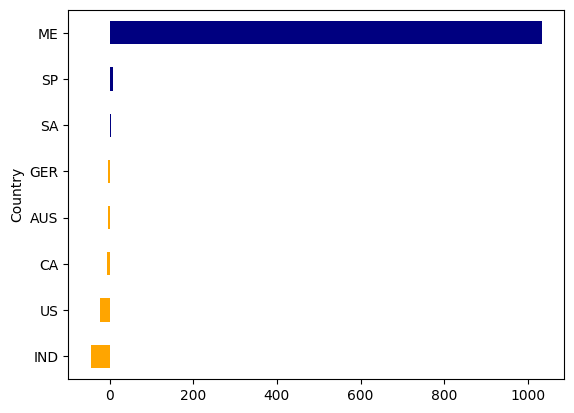

In [90]:
country_final = pd.DataFrame({
    "Country": cp_last_country.index,
    "Percent": ((cp_last_country.iloc[:, 0] - cp__the_rest2_country.iloc[:, 0]) / cp__the_rest2_country.iloc[:, 0] * 100)
})
country_final.sort_values(by="Percent", inplace=True)
country_final['positive'] = country_final["Percent"] >= 0
country_final["Percent"].plot(kind='barh', color=country_final.positive.map({True: 'navy', False: 'orange'}))

In [91]:
new_df.Country.value_counts()

Country
SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: count, dtype: int64

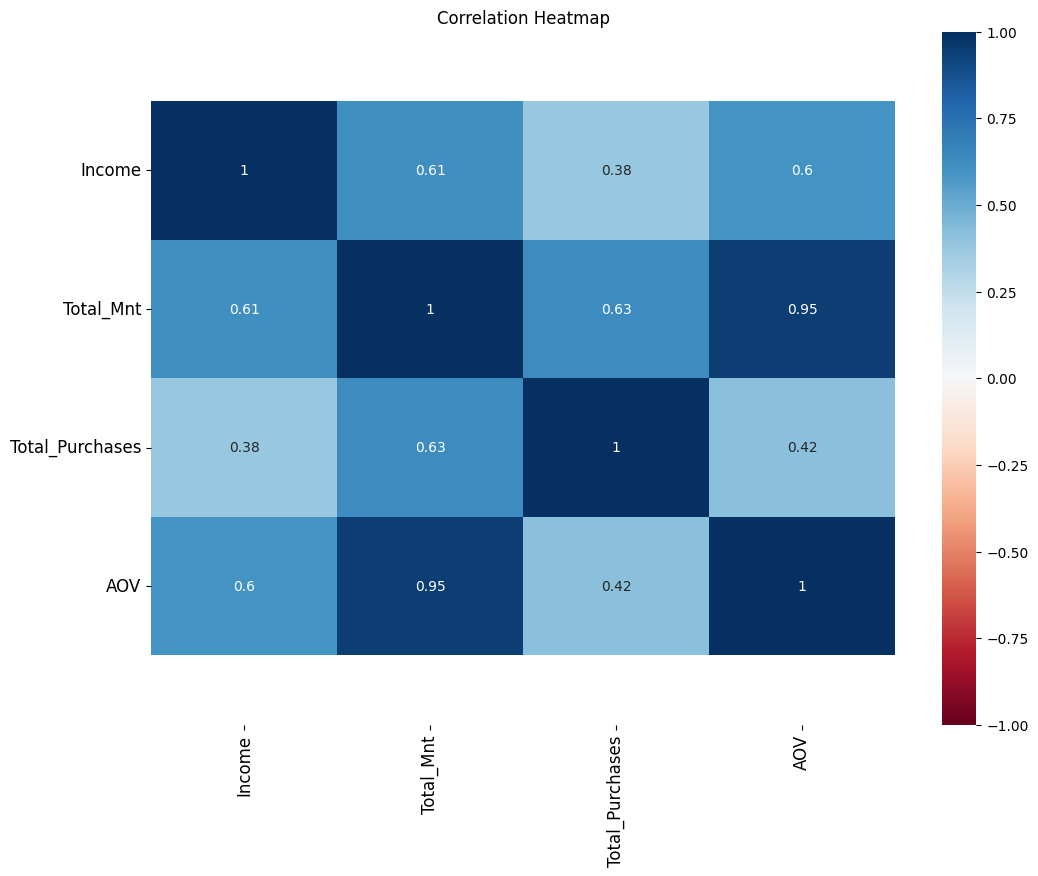

In [92]:
# select columns to plot
new_df2 = new_df[new_df.AOV <= (new_df.AOV.mean()+3*new_df.AOV.std())]
new_df2.replace([np.inf, -np.inf], 0, inplace=True)
new_df2 = new_df2[new_df2.Total_num_purchase <= (new_df2.Total_num_purchase.mean()+3*new_df2.Total_num_purchase.std())]
new_df2 = new_df2[new_df2.Total_Mnt <= (new_df2.Total_Mnt.mean()+3*new_df2.Total_Mnt.std())]

df_to_plot = new_df2[['Income', 'Total_Mnt','Total_num_purchase', 'AOV']]
df_to_plot.rename(columns={'Total_num_purchase':'Total_Purchases'}, inplace=True)

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  annot = True,cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap2.png', bbox_inches='tight')
plt.show()

In [93]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [94]:
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['Total_accept'])  # Features
y=rd_df['Total_accept']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4642717633928572
Mean Squared Error: 0.6372613121718956
Root Mean Squared Error: 0.7982864850239516


In [95]:
from scipy.stats import pearsonr

list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df[i], y=new_df['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  0.47877613689047094
Pearson p-value:  1.5384536902711216e-128
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.30103342502970004
Pearson p-value:  4.4065093290155207e-48
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.1906800665852351
Pearson p-value:  9.275051767780243e-20
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.15914618281257256
Pearson p-value:  3.6973440948179725e-14
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.1497632666014456
Pearson p-value:  1.0826316641118868e-12
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  0.17808985183102105
Pearson p-value:  2.1328375413166044e-17
 


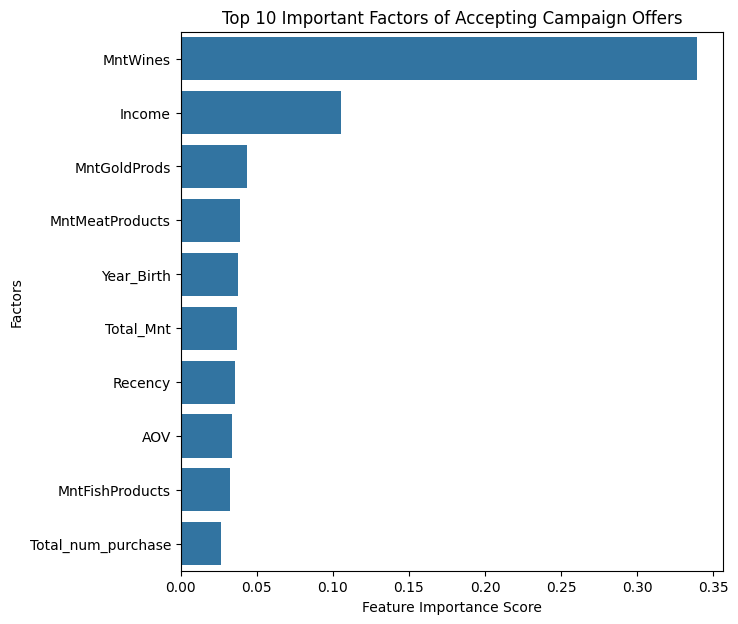

In [96]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

In [97]:
new_df[['Join_month', 'Join_weekday']].mean()

Join_month      6.465802
Join_weekday    2.988824
dtype: float64

## Section 04: CMO Recommendations

### The goal of this project

   I'm a marketing data analyst and I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze the data set to understand this problem and propose data-driven solutions.
   
### Summaries

- The last campaign performed nearly twice as good as the previous campaigns
    - The last campaign attracted more valuable customers in terms of AOV, the total amount spent, and the total number of purchases, compared to the customers who were attracted by the previous campaigns.
    - Spain has relatively more customers (+4%) and ME that were attracted to the last campaign, and India has fewer customers (-3%) that were attracted to the previous campaigns
    - In terms of product categories, the customers in the last campaign spent nearly two times more money on meat products and wines compared to the customers in the previous campaigns.
    - In terms of purchasing channels, the customers in the last campaign purchased more evenly through stores, websites, and catalogs, whereas the customers in the previous campaigns mostly purchased through stores and websites.
    - The customers in the last campaign earned 20% more salary than the customers in the previous campaigns.
    
    
- Most customers purchase through physical stores, where people tend to spend more amount per purchase. The reason might be the customers had more impulsive purchases when they saw other similar products in stores.


- People having kids at home are less valuable customers as they...
    - tend to purchase less
    - tend to has a high number of purchases made with a discount
    
    
- The average customer...
    - became a customer on Thursdays
    - became a customer in Mid-June
    
### Actionable Data-Driven Solutions

#### On Acquisition:
1. Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines

2. Try to spend more marketing budget in Spain and ME, and less in India

3. Try to have a brand discount day on Thursday or a brand discount month in June to attract new customers

#### On Increasing revenue:

1. Have marketing campaigns to convert customers who shop mostly on a website or catalog to in-store purchasers as most in-store purchases have high average order volume.

2. Build a loyalty program to make high-income customers loyal as long as possible 